In [1]:
%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from poseutils.props import calculate_limb_lengths
from poseutils.props import get_angles_from_joints
from poseutils.props import get_joints_from_angles
from poseutils.props import get_body_centered_axes
from poseutils.transform import normalize_torso_2d
from poseutils.view import draw_skeleton
from poseutils.view import draw_axes
from poseutils.constants import adjacency_list
from poseutils.constants import dataset_indices

In [2]:
print(adjacency_list(14))

[[1, 4, 7], [2], [3], [], [5], [6], [], [8, 11], [9], [10], [], [12], [13], []]


In [3]:
indices_to_select, _ = dataset_indices("3dpw", 14)# [0, 2, 5, 8, 1, 4, 7, 12, 16, 18, 20, 17, 19, 21]
dpath = "/home/saad/Personal/Research/Dataset/CrossDataset/3dpw_wo_invalid.npz"
data = np.load(dpath, allow_pickle=True, encoding='latin1')['data'].item()
data_3d = data['train']['combined_3d_cam'][:, indices_to_select, :]
data_2d = data['train']['combined_2d'][:, indices_to_select, :]

In [6]:
up, fwd, right, axes = get_body_centered_axes(data_3d[0, :, :])

In [7]:
angles_3d, _ = get_angles_from_joints(data_3d[0, :, :])
limb_length = calculate_limb_lengths(data_3d[0, :, :])
joints_3d = get_joints_from_angles(angles_3d, limb_length)

<IPython.core.display.Javascript object>


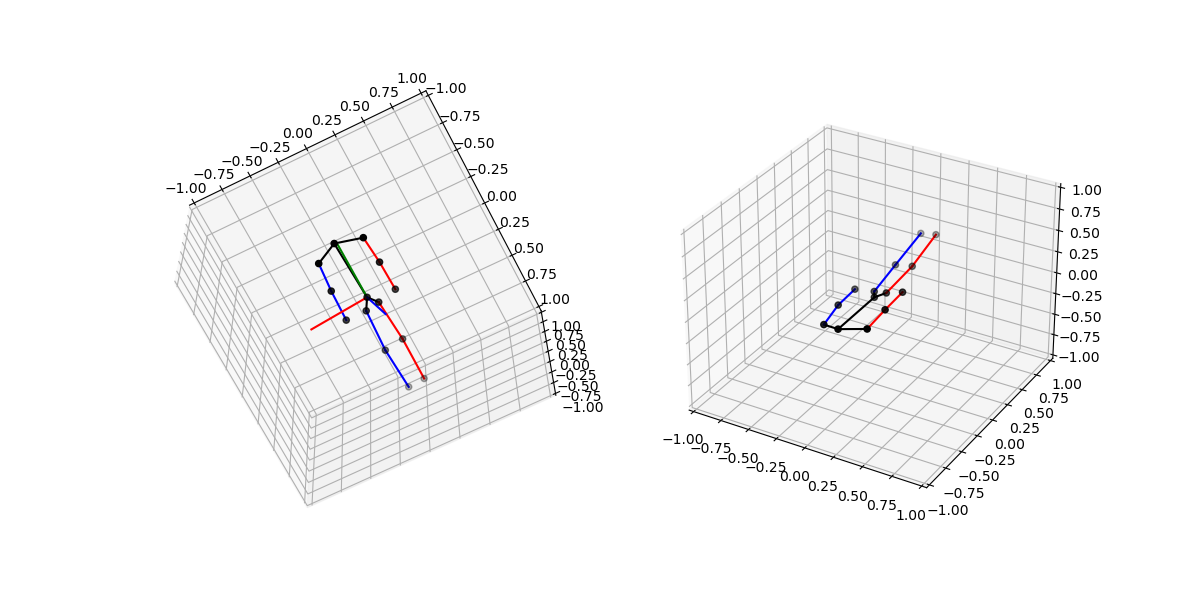

In [9]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d', xlim=(-1, 1), ylim=(-1, 1), zlim=(-1, 1))
bx = fig.add_subplot(122, projection='3d', xlim=(-1, 1), ylim=(-1, 1), zlim=(-1, 1))

draw_skeleton(data_3d[0, :, :] - data_3d[0, 0, :], ax)
draw_axes(axes, np.zeros(3), ax)
draw_skeleton(joints_3d, bx)

plt.show()

In [6]:
torso_2d, widths, names = normalize_torso_2d(data_2d[:, [1, 4, 8, 11], :])

100%|██████████| 22735/22735 [00:01<00:00, 16082.21it/s]


In [10]:
for i in range(3):
    print(f"{names[i]} : {np.mean(widths[i, :])}")

RH -> LH : 50.604333005745715
RH -> LS : 310.96999657317303
RH -> RS : 296.11366209898


In [8]:
indices_to_select, indices_to_sort = dataset_indices("gpa", 14)
dpath = "/home/saad/Personal/Research/Dataset/CrossDataset/gpa_xyz.npz"
data = np.load(dpath, allow_pickle=True, encoding='latin1')['data'].item()
data_3d = data['train']['3d'][:, indices_to_select, :][:, indices_to_sort, :]/1000
data_2d = data['train']['2d'][:, indices_to_select, :][:, indices_to_sort, :]

<IPython.core.display.Javascript object>


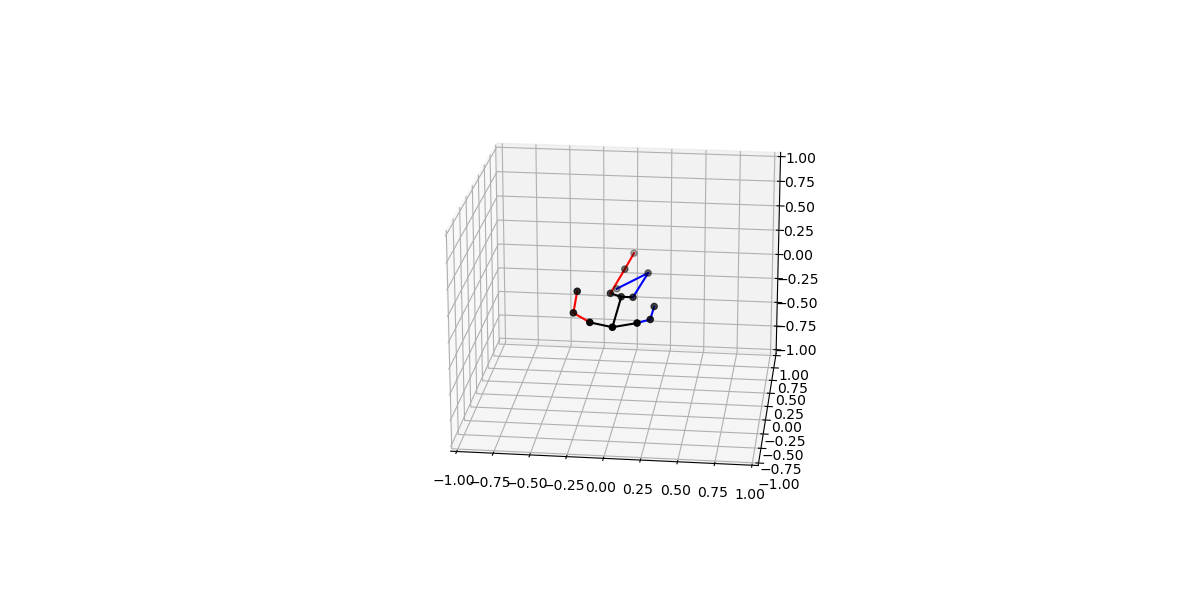

In [10]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d', xlim=(-1, 1), ylim=(-1, 1), zlim=(-1, 1))

draw_skeleton(data_3d[500, :, :] - data_3d[500, 0, :], ax)

plt.show()